<a href="https://colab.research.google.com/github/ressiwage/LEARN-ml-classify-arthrosis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-utils
!pip install seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -*- coding: utf-8 -*-
"""notebook505ad4e89a.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1_dF6lEpkO8PTzUyelU2NG3asb5obPe1T
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/drive/MyDrive/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [ ]:
"""import os
import cv2
import glob
import collections
import numpy as np
import matplotlib.pyplot as plt

os.listdir('/content/drive/MyDrive/train/')

""\<b> We can see that the number of samples per class are imbalanced. The quantity samples of class 0,1 and 2 are almost balanced, so we will be using these classes only. </b> </br>
Converting all images to size 320, 320
""

first_class = []
PATH = '/content/drive/MyDrive/train/'
xdata = collections.defaultdict(list)
for classes in [0,1,2]:
    ls =  os.listdir(PATH+str(classes))
    print(f"Processing images class: {classes}")
    for samples in ls[:1000]:

        img = cv2.resize(cv2.imread(PATH+str(classes)+'/'+samples),(100,100))
        xdata[classes].append(img)

"""concatenating all classes and their respective labels"""

Y = [0 for i in range(len(xdata[0]))] + [1 for i in range(len(xdata[1]))] + [2 for i in range(len(xdata[2]))] #concatenating both y data
X = xdata[0] + xdata[1] + xdata[2] #concatenating both x data

len(X), len(Y)
#sane length means correct processing

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=0, shuffle=True)

del(X)
del(Y)
del(xdata)

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential




model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.5))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
print(model.summary())

model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=200,batch_size=64,validation_data = (xtest,ytest))

from sklearn.metrics import classification_report

model.evaluate(xtest,ytest)"""

Processing images class: 0
Processing images class: 1
Processing images class: 2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 49, 49, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                    

KeyboardInterrupt: 

Processing images class: 0
Processing images class: 1
Processing images class: 2
{1: 300, 2: 300, 0: 300}
{0: 700, 1: 700, 2: 700}
(112, 112, 3) [[[0.11764705882352941, 0.11764705882352941, 0.11764705882352941], [0.12156862745098039, 0.12156862745098039, 0.12156862745098039], [0.12549019607843137, 0.12549019607843137, 0.12549019607843137], [0.14901960784313725, 0.14901960784313725, 0.14901960784313725], [0.12549019607843137, 0.12549019607843137, 0.12549019607843137], [0.13333333333333333, 0.13333333333333333, 0.13333333333333333], [0.15294117647058825, 0.15294117647058825, 0.15294117647058825], [0.1607843137254902, 0.1607843137254902, 0.1607843137254902], [0.17254901960784313, 0.17254901960784313, 0.17254901960784313], [0.17254901960784313, 0.17254901960784313, 0.17254901960784313], [0.18823529411764706, 0.18823529411764706, 0.18823529411764706], [0.24313725490196078, 0.24313725490196078, 0.24313725490196078], [0.26666666666666666, 0.26666666666666666, 0.26666666666666666], [0.31764705

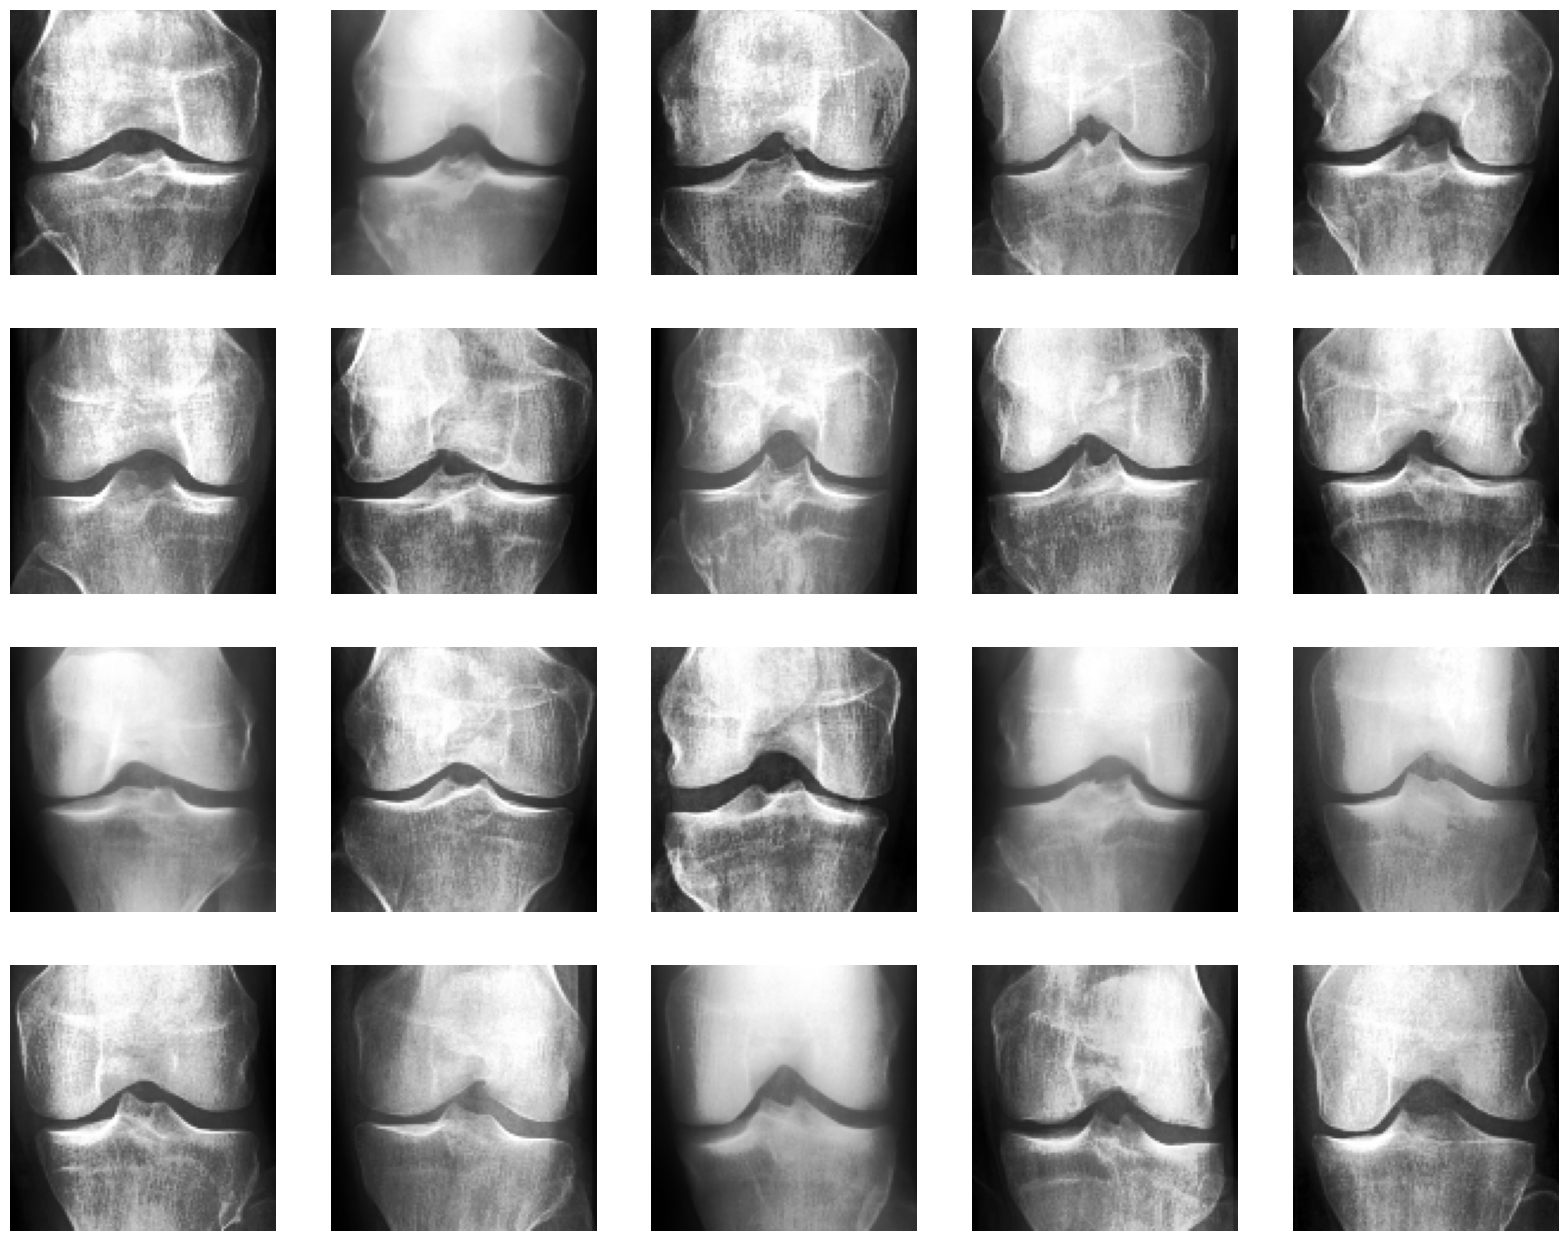

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 109, 109, 1024)    50176     
                                                                 
 batch_normalization (Batch  (None, 109, 109, 1024)    4096      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 1024)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 54, 54, 1024)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 256)       2359552   
                                                                 
 batch_normalization_1 (Bat  (None, 52, 52, 256)      

In [ ]:
import os
import cv2
import glob
import collections
import numpy as np
import matplotlib.pyplot as plt

os.listdir('/content/drive/MyDrive/train/')

"""\<b> We can see that the number of samples per class are imbalanced. The quantity samples of class 0,1 and 2 are almost balanced, so we will be using these classes only. </b> </br>
Converting all images to size 320, 320
"""

first_class = []
PATH = '/content/drive/MyDrive/train/'
xdata = collections.defaultdict(list)
for classes in [0,1,2]:
    ls =  os.listdir(PATH+str(classes))
    print(f"Processing images class: {classes}")
    for samples in ls[:1000]:

        img = cv2.resize(cv2.imread(PATH+str(classes)+'/'+samples),(112,112))
        # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # img = cv2.equalizeHist(img)

        # convert from RGB color-space to YCrCb
        ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

        # equalize the histogram of the Y channel
        ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

        # convert back to RGB color-space from YCrCb
        equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

        xdata[classes].append(equalized_img/255)


# массивный issue: картинки передавались в [0..255], а не в [0..1] и это была катастрофа

def show_image_samples(gen ):
    plt.figure(figsize=(20, 20))
    for i in range(len(gen)):
        plt.subplot(5, 5, i + 1)
        image=gen[i]
        plt.imshow(image)

        plt.title('', color='blue', fontsize=14)
        plt.axis('off')
    plt.show()



"""concatenating all classes and their respective labels"""
from sklearn.model_selection import train_test_split

Y = [0 for i in range(len(xdata[0]))] + [1 for i in range(len(xdata[1]))] + [2 for i in range(len(xdata[2]))] #concatenating both y data
X = xdata[0] + xdata[1] + xdata[2] #concatenating both x data

len(X), len(Y)
#sane length means correct processing

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape


xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=[0]*1000+[1]*1000+[2]*1000)
print({i:ytest.tolist().count(i) for i in ytest.tolist()})
print({i:ytrain.tolist().count(i) for i in ytrain.tolist()})
print(xtrain[0].shape,xtrain[0].tolist())
show_image_samples(xtrain[:20])

del(X)
del(Y)
del(xdata)

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization, Reshape, ReLU, add, GlobalAveragePooling2D, RandomRotation, RandomFlip
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow import compat
from keras.optimizers import Adam, SGD
from keras.regularizers import L1, L2, L1L2
from keras.utils import plot_model, model_to_dot
from tensorflow.keras import Sequential as Seq


data_augmentation = Seq([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

# try:
#   sess = compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
#   from tensorflow.python.client import device_lib
#   print(device_lib.list_local_devices())
# except:
#   from keras import backend as K
#   K.tensorflow_backend._get_available_gpus()

"""
v1
amount, size = 70, 6
model=Sequential()
model.add(Conv2D(70,(6,6),activation='relu',input_shape=(112,112,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(70,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Dropout(0.5))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(35,(3,3),activation='relu'))
model.add(Dropout(0.5))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
print(model.summary())"""



#v2
model=Sequential()

model.add(Conv2D(1024,(4,4),activation='relu',input_shape=(112,112,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20, activation='relu'))


model.add(Dense(3, activation='softmax'))


#v3
"""

         conv2d
         conv2d
    | |  maxpool (b1)
    | |
    | |> conv2d
    |    conv2d
| | |>   + (b2)
| |
| |>      conv2d
|         conv2d
|>     |  + (b3)
       |
       |> conv2d
          globalaveragepool
          dense(256)
          dropout
          dense(3)

"""
"""
inputs = keras.Input(shape=(112, 112, 3), name="img")

x = Conv2D(48, 3, activation="relu")(inputs)
x = Conv2D(48, 3, activation="relu")(x)
block_1_output = MaxPooling2D(3)(x)

x = Conv2D(48, 3, activation="relu")(block_1_output)
x = Conv2D(48, 3, activation="relu")(x)
rec_out = add([x, block_1_output])

for i in range(3):
  x = Conv2D(48, 3, activation="relu")(rec_out)
  x = Conv2D(48, 3, activation="relu")(x)
  rec_out = add([x, rec_out])

x = Conv2D(64, 3, activation="relu")(rec_out)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
"""

model.compile(optimizer = Adam(learning_rate=0.0015),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


print(model.summary())

h = model.fit(xtrain,ytrain,epochs=300,batch_size=32 #64
          ,validation_data = (xtest,ytest), shuffle=True)
import keras
from matplotlib import pyplot as plt
# regr = lambda history, name: np.polyfit(history.history[name]['epoch'], history.history[name][name], 1)

# def plotRegr(history, name, plt):
#   m, b = regr(history, name)
#   plt.plot(history.history[name]['epoch'], m*history.history[name]['epoch']+b)

history = h
plt.plot(history.history['accuracy'])
# plotRegr(history, 'accuracy', plt)
plt.plot(history.history['val_accuracy'])
# plotRegr(history, 'val_accuracy', plt)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',  'val', 'rt', 'rv'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])



# plotRegr(history, 'loss', plt)
plt.plot(history.history['val_loss'])
# plotRegr(history, 'val_loss', plt)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'r', 'r'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report

print('eval', model.evaluate(xtest,ytest))
model.evaluate(xtest,ytest)

from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(xtest)

#Create confusion matrix and normalizes it over predicted (columns)
conf = confusion_matrix(ytest.argmax(axis=1), y_prediction.argmax(axis=1) , normalize='pred')

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



df_cm = pd.DataFrame(conf, range(3), range(3))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


нужно посмотреть какие классы правильно распознаются а какие нет
1) 50
2) 33 случайно
3) 54